**a) Perform K-means clustering on MNIST data from scratch. Instead of using Euclidian distance as
distance metric use Cosine Similarity as distance metric. Clustering should be done in 10, 7, and
4 clusters.**

---



***Importing Libraries and dataset, reading the dataset:***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

print(train_data.head())
print(train_data.info())
print(train_data.describe())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None

***Data Pre-processing, Normalization:***

In [ ]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

***K-means clustering from scratch using cosine similarity:***

In [ ]:
num_clusters = [10, 7, 4]

def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y + 1e-8)  # Add a small value to avoid division by zero

def kmeans_cosine_similarity(X, k, max_iters = 300, tolerance = 1e-4, random_seed = 42):
    np.random.seed(random_seed)

    centroids = [X[np.random.choice(X.shape[0])]]
    while len(centroids) < k:
        dist = [min([np.sqrt(((x - c) ** 2).sum()) for c in centroids]) for x in X]
        prob = dist / sum(dist)
        cumm_prob = prob.cumsum()
        r = np.random.rand()
        for j, p in enumerate(cumm_prob):
            if r < p:
                centroids.append(X[j])
                break

    centroids = np.array(centroids)

    for iter in range(max_iters):
        similarity = np.array([[cosine_similarity(x, centroid) for centroid in centroids] for x in X])
        labels = np.argmax(similarity, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(np.abs(centroids - new_centroids) < tolerance):
            break
        centroids = new_centroids

    return labels, centroids

In [ ]:
for k in num_clusters:
    labels, centroids = kmeans_cosine_similarity(X_train, k)
    print(f"Clustering with {k} clusters completed for training data.")

    print("Cluster Assignments for the first 10 data points:")
    print(labels[:10])

    print("Final Cluster Centers:")
    print(centroids)

Clustering with 10 clusters completed for training data.
Cluster Assignments for the first 10 data points:
[3 5 2 0 2 0 1 3 9 1]
Final Cluster Centers:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Clustering with 7 clusters completed for training data.
Cluster Assignments for the first 10 data points:
[1 5 2 3 2 3 3 1 3 1]
Final Cluster Centers:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Clustering with 4 clusters completed for training data.
Cluster Assignments for the first 10 data points:
[3 3 2 1 2 0 2 3 2 3]
Final Cluster Centers:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**b) Visualize the images getting clustered in different clusters.**

 ---


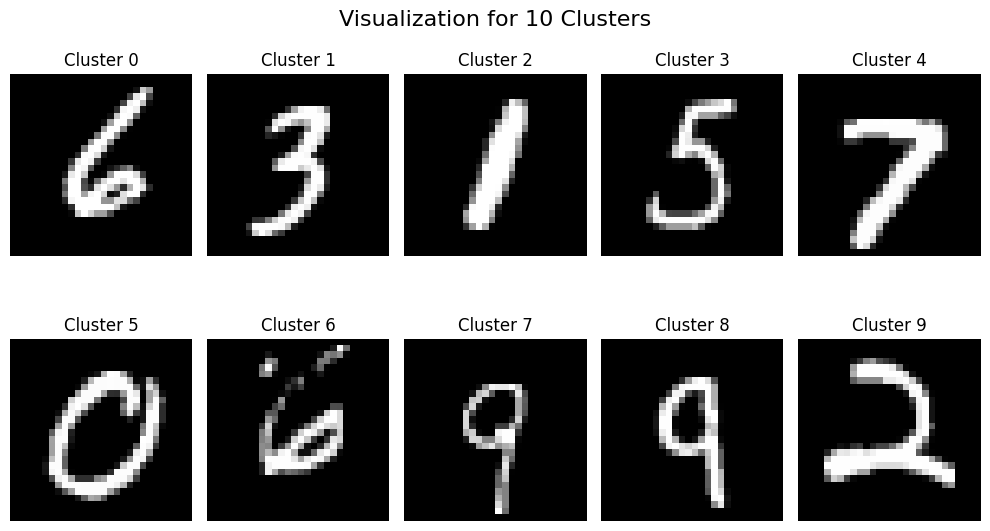

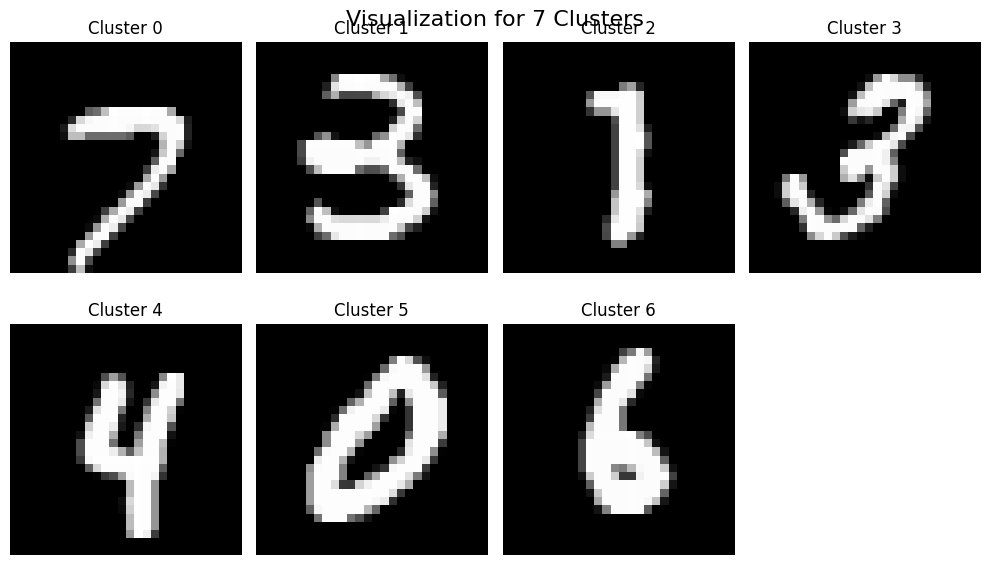

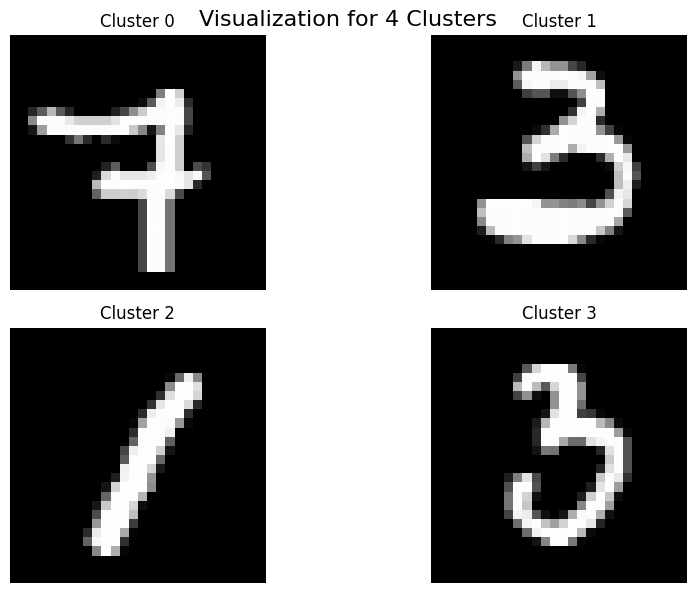

In [ ]:
for num_cluster in num_clusters:
    labels, centroids = kmeans_cosine_similarity(X_train, num_cluster)

    cluster_img = {i: [] for i in range(num_cluster)}

    for i, label in enumerate(labels):
        cluster_img[label].append(X_train[i])

    plt.figure(figsize=(10, 6))
    for cluster, images in cluster_img.items():
        plt.subplot(2, (num_cluster + 1) // 2, cluster + 1)
        random_img_ind = np.random.randint(len(images))
        image = images[random_img_ind].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'Cluster {cluster}')
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(f'Visualization for {num_cluster} Clusters', fontsize=16)
    plt.show()

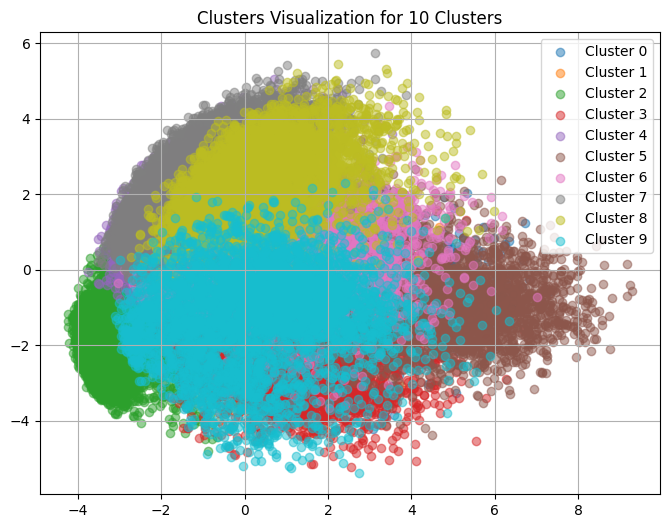

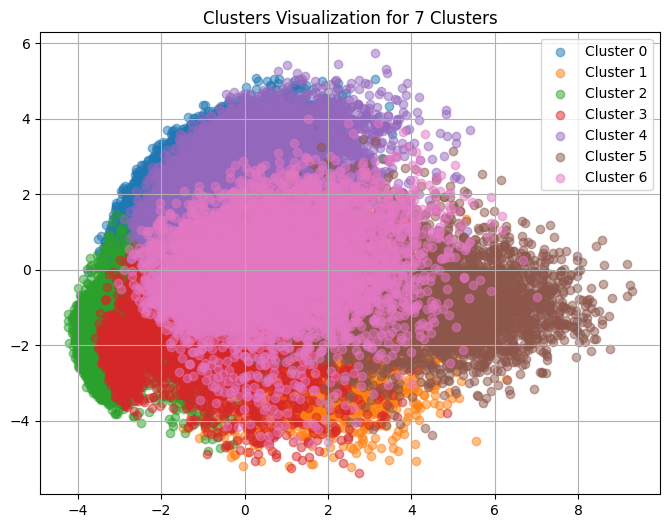

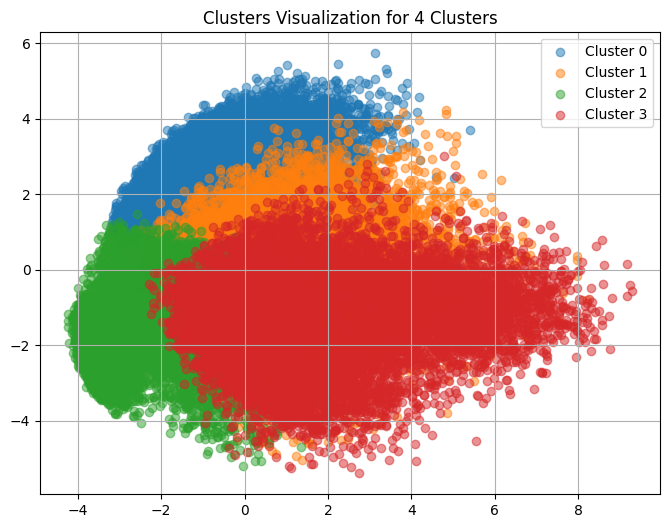

In [ ]:
from sklearn.decomposition import PCA

def visualize_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(labels))):
        plt.scatter(reduced_X[labels == i, 0], reduced_X[labels == i, 1], label=f'Cluster {i}', alpha=0.5)

    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

for num_cluster in num_clusters:
    labels, _ = kmeans_cosine_similarity(X_train, num_cluster)

    visualize_clusters(X_train, labels, f'Clusters Visualization for {num_cluster} Clusters')

**d) Try to write a python function which finds optimal number of clusters for this dataset?**

---



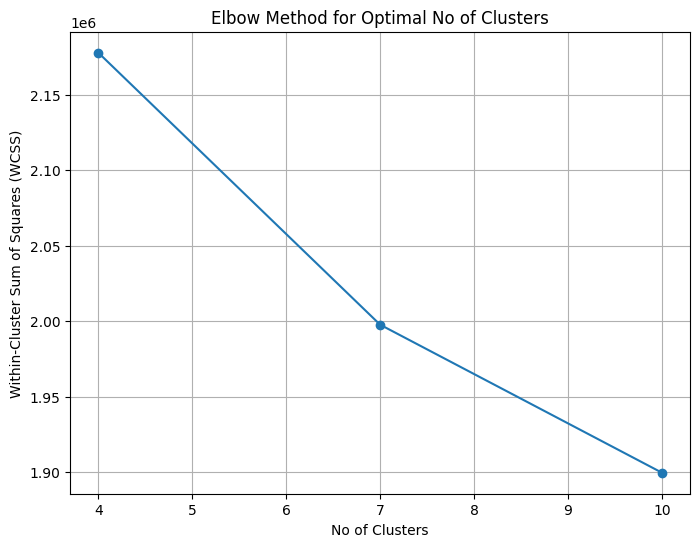

The optimal number of clusters for [4, 7, 10] clusters is 10


In [ ]:
def find_optimal_clusters(data, num_clusters):
    wcss = []  # Within-Cluster Sum of Squares

    for k in num_clusters:
        labels, _ = kmeans_cosine_similarity(data, k)
        cluster_centre = [data[labels == j].mean(axis=0) for j in range(k)]
        wcss.append(sum(np.sum((data[labels == j] - cluster_centre[j]) ** 2) for j in range(k)))

    plt.figure(figsize=(8, 6))
    plt.plot(num_clusters, wcss, marker='o', linestyle='-')
    plt.title('Elbow Method for Optimal No of Clusters')
    plt.xlabel('No of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()

    optimal_cl = num_clusters[np.argmin(wcss)]
    return optimal_cl

num_clusters_ex = [4, 7, 10]

opti_num_clusters = find_optimal_clusters(X_train, num_clusters=num_clusters_ex)
print(f'The optimal number of clusters for {num_clusters_ex} clusters is {opti_num_clusters}')
